In [1]:
## Create Latitude and Longitude Combos


In [58]:
# Import the dependencies.
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import numpy as np
from config import o_weather
import requests
from scipy.stats import linregress
import os

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
#when importing from a file thats py already don't need as py
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + o_weather

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# WARNING zipped tuple cann only be unziiped once before remvoed from computer's memory

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters./ want the 1st iteration of the logging for each recorded response
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
#### Generate Random World Cities

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [12]:
##Loop through Cities and Build City URL

In [13]:
#for i, item in enumerate(list):
#syntax for method

In [14]:
#used enumerate to loop while keeping track of the index vaules in a seprate var

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | sola
Processing Record 3 of Set 1 | slave lake
Processing Record 4 of Set 1 | melito di porto salvo
Processing Record 5 of Set 1 | zhigansk
Processing Record 6 of Set 1 | vaitape
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | mandalgovi
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | san felipe
Processing Record 21 of Set 1 | phan thiet
Processing Record 22 of Set 1 | simbahan
Processing Record 23 of Set 1 | lebu
Processing Record 24 of Set 1 | saint-philippe
Processi

Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | esso
Processing Record 42 of Set 4 | kurduvadi
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | trinidad
Processing Record 45 of Set 4 | wanning
Processing Record 46 of Set 4 | mehamn
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | kirakira
Processing Record 49 of Set 4 | senneterre
Processing Record 50 of Set 4 | egvekinot
Processing Record 1 of Set 5 | hualmay
Processing Record 2 of Set 5 | balsas
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | yumen
Processing Record 5 of Set 5 | yurty
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | tura
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | teguldet
Processing Record 10 of Set 5 | nome
Processing Record 11 of Set 5 | nikolskoye
Processing Record 12 of Set 5 | severo-kurils

Processing Record 29 of Set 8 | san jose de guanipa
Processing Record 30 of Set 8 | chancay
Processing Record 31 of Set 8 | north platte
Processing Record 32 of Set 8 | bosaso
Processing Record 33 of Set 8 | turayf
Processing Record 34 of Set 8 | butterworth
Processing Record 35 of Set 8 | vestmanna
Processing Record 36 of Set 8 | norman wells
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | ruthin
Processing Record 39 of Set 8 | muros
Processing Record 40 of Set 8 | khonuu
City not found. Skipping...
Processing Record 41 of Set 8 | kushima
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | markova
Processing Record 44 of Set 8 | feuchtwangen
Processing Record 45 of Set 8 | grand-lahou
Processing Record 46 of Set 8 | sampit
Processing Record 47 of Set 8 | agadez
Processing Record 48 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 8 | warqla
City not found. Skipping...
Processing Record 50 of Se

Processing Record 16 of Set 12 | hervey bay
Processing Record 17 of Set 12 | lolua
City not found. Skipping...
Processing Record 18 of Set 12 | andrelandia
Processing Record 19 of Set 12 | hirado
Processing Record 20 of Set 12 | cirebon
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | okha
Processing Record 23 of Set 12 | batagay
Processing Record 24 of Set 12 | nicoya
Processing Record 25 of Set 12 | ust-tsilma
Processing Record 26 of Set 12 | tangshan
Processing Record 27 of Set 12 | loandjili
Processing Record 28 of Set 12 | korem
Processing Record 29 of Set 12 | havre-saint-pierre
Processing Record 30 of Set 12 | george town
Processing Record 31 of Set 12 | marsa matruh
Processing Record 32 of Set 12 | yanan
City not found. Skipping...
Processing Record 33 of Set 12 | kuragino
Processing Record 34 of Set 12 | hammerfest
Processing Record 35 of Set 12 | dubti
Processing Record 36 of Set 12 | pleasanton
Processing Record 37 of Set 12 | fredericksburg
Processin

In [16]:
len(city_data)
city_data

[{'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 74.12,
  'Humidity': 75,
  'Cloudiness': 100,
  'Wind Speed': 16.78,
  'Country': 'PF',
  'Date': '2021-09-25 19:42:12'},
 {'City': 'Sola',
  'Lat': -13.8833,
  'Lng': 167.55,
  'Max Temp': 78.84,
  'Humidity': 76,
  'Cloudiness': 35,
  'Wind Speed': 12.01,
  'Country': 'VU',
  'Date': '2021-09-25 19:42:13'},
 {'City': 'Slave Lake',
  'Lat': 55.2834,
  'Lng': -114.769,
  'Max Temp': 62.58,
  'Humidity': 51,
  'Cloudiness': 1,
  'Wind Speed': 18.41,
  'Country': 'CA',
  'Date': '2021-09-25 19:40:59'},
 {'City': 'Melito Di Porto Salvo',
  'Lat': 37.9222,
  'Lng': 15.7714,
  'Max Temp': 77.74,
  'Humidity': 78,
  'Cloudiness': 91,
  'Wind Speed': 3.44,
  'Country': 'IT',
  'Date': '2021-09-25 19:42:13'},
 {'City': 'Zhigansk',
  'Lat': 66.7697,
  'Lng': 123.3711,
  'Max Temp': 31.06,
  'Humidity': 89,
  'Cloudiness': 73,
  'Wind Speed': 10.25,
  'Country': 'RU',
  'Date': '2021-09-25 19:42:14'},
 {'City': 'Vaitape',


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.12,75,100,16.78,PF,2021-09-25 19:42:12
1,Sola,-13.8833,167.5500,78.84,76,35,12.01,VU,2021-09-25 19:42:13
2,Slave Lake,55.2834,-114.7690,62.58,51,1,18.41,CA,2021-09-25 19:40:59
3,Melito Di Porto Salvo,37.9222,15.7714,77.74,78,91,3.44,IT,2021-09-25 19:42:13
4,Zhigansk,66.7697,123.3711,31.06,89,73,10.25,RU,2021-09-25 19:42:14
5,Vaitape,-16.5167,-151.7500,78.64,76,14,9.66,PF,2021-09-25 19:42:14
6,Codrington,-38.2667,141.9667,45.48,67,99,4.25,AU,2021-09-25 19:42:15
7,Mataura,-46.1927,168.8643,37.47,96,56,4.45,NZ,2021-09-25 19:42:15
8,Punta Arenas,-53.1500,-70.9167,46.11,45,62,17.20,CL,2021-09-25 19:42:15
9,Necochea,-38.5473,-58.7368,68.04,71,0,14.74,AR,2021-09-25 19:42:16


In [18]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed" ]


In [19]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,2021-09-25 19:42:12,75,-23.1203,-134.9692,74.12,16.78
1,Sola,35,VU,2021-09-25 19:42:13,76,-13.8833,167.5500,78.84,12.01
2,Slave Lake,1,CA,2021-09-25 19:40:59,51,55.2834,-114.7690,62.58,18.41
3,Melito Di Porto Salvo,91,IT,2021-09-25 19:42:13,78,37.9222,15.7714,77.74,3.44
4,Zhigansk,73,RU,2021-09-25 19:42:14,89,66.7697,123.3711,31.06,10.25
...,...,...,...,...,...,...,...,...,...
568,Machinga,80,MW,2021-09-25 19:45:49,46,-15.1685,35.3000,74.53,5.99
569,Shache,0,CN,2021-09-25 19:45:49,21,38.4167,77.2406,66.90,2.73
570,Matara,100,LK,2021-09-25 19:45:49,87,5.9485,80.5353,78.64,10.94
571,Marapanim,100,BR,2021-09-25 19:45:50,67,-0.7175,-47.6997,83.43,8.10


In [20]:
# For Below
#The last line in the code block will export the DataFrame to a CSV file, 
#with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame,
#that header will be present in the DataFrame.

In [21]:
# Create the output file (CSV).// unhash when iteration is correct!
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
#can add files to gitignore interesting

In [23]:
## Plotting Lat VS TEMP

In [24]:
# Extract relevant fields from the DataFrame for plotting./// retieving the data is the first step
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

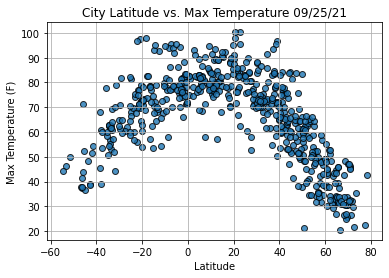

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

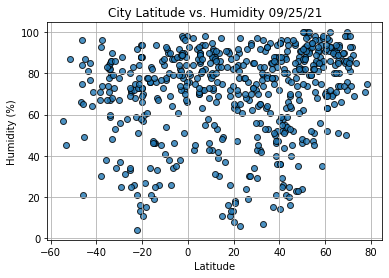

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

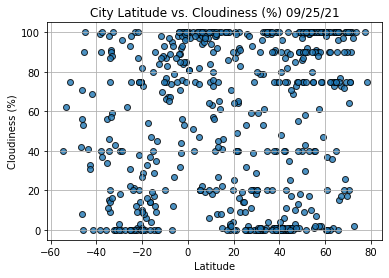

In [27]:
# Build the scatter plots for latitude vs. cloudiness. 6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

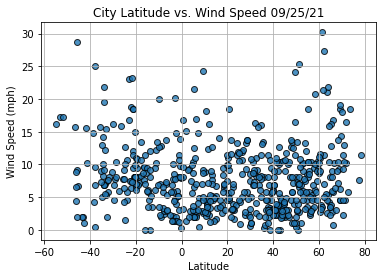

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
## Regresssions 6.4.2

In [30]:
### Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 
### Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable

### A correlation coefficient close to 1 shows a strong positive correlation, 
### whereas close to –1 shows a strong negative correlation. 
###bA correlation coefficient close to zero is no correlation.

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.///// format to use below
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
## Dataframes

In [34]:
#doing a regress analysis on max temps in n+s hemispheres
#1st create df from citydata_df

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Slave Lake,1,CA,2021-09-25 19:40:59,51,55.2834,-114.7690,62.58,18.41
3,Melito Di Porto Salvo,91,IT,2021-09-25 19:42:13,78,37.9222,15.7714,77.74,3.44
4,Zhigansk,73,RU,2021-09-25 19:42:14,89,66.7697,123.3711,31.06,10.25
10,Upernavik,2,GL,2021-09-25 19:42:16,69,72.7868,-56.1549,21.70,5.86
13,Khatanga,97,RU,2021-09-25 19:42:17,89,71.9667,102.5000,29.88,10.27
...,...,...,...,...,...,...,...,...,...
565,Abu Zabad,99,SD,2021-09-25 19:45:48,80,12.3500,29.2500,75.29,5.26
566,Forio,80,IT,2021-09-25 19:45:48,59,40.7342,13.8646,74.82,3.06
567,Westport,1,US,2021-09-25 19:45:48,55,41.1415,-73.3579,77.99,4.00
569,Shache,0,CN,2021-09-25 19:45:49,21,38.4167,77.2406,66.90,2.73


In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Slave Lake,1,CA,2021-09-25 19:40:59,51,55.2834,-114.7690,62.58,18.41
3,Melito Di Porto Salvo,91,IT,2021-09-25 19:42:13,78,37.9222,15.7714,77.74,3.44
4,Zhigansk,73,RU,2021-09-25 19:42:14,89,66.7697,123.3711,31.06,10.25
10,Upernavik,2,GL,2021-09-25 19:42:16,69,72.7868,-56.1549,21.70,5.86
13,Khatanga,97,RU,2021-09-25 19:42:17,89,71.9667,102.5000,29.88,10.27


In [37]:
# Create Northern and Southern Hemisphere DataFrames.// assigning to df to perform lin reg
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

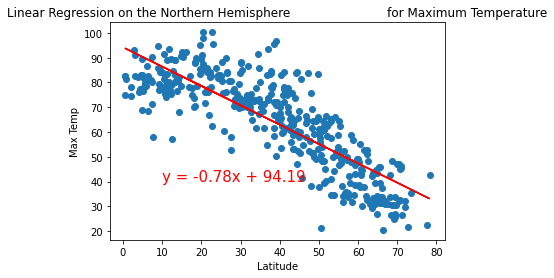

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

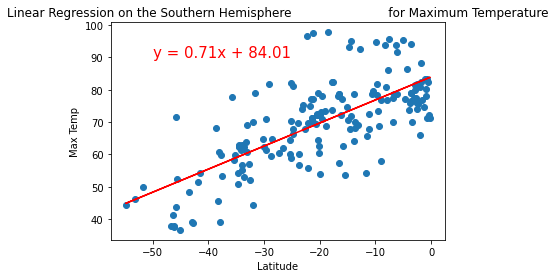

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

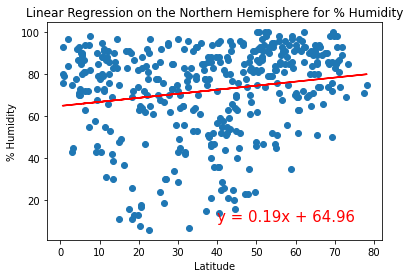

In [40]:
# Linear regression on the Northern Hemisphere/// n ew line added on here????
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

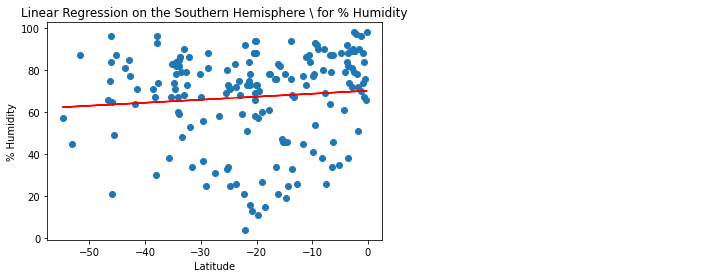

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(40,10))
                        

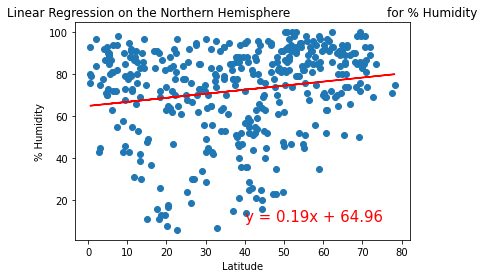

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

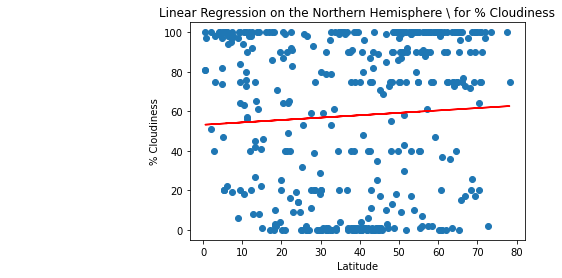

In [43]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))
#not sure why it won't show formula

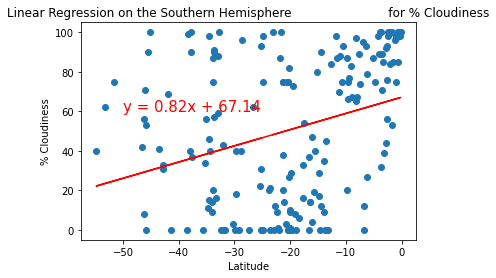

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

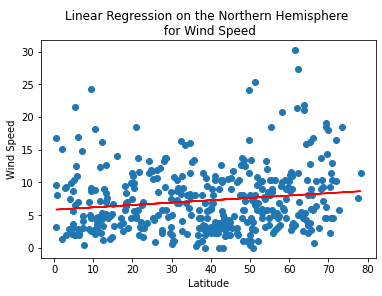

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

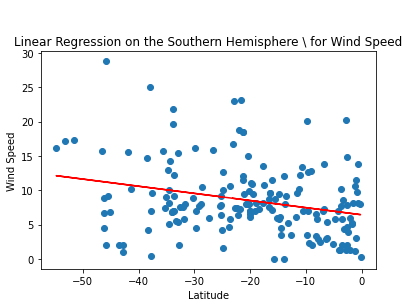

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,35))

In [47]:
## G Maps API
    # convert coordinates into locations on a map
    # create heatmaps based on density/weight of a feature
    # identify nearest hotels/restaurants to a given location
    # determine distance between two points

In [48]:
#basic heatmaps need lat/long of location + measurement value for each lat/long in an array

In [49]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Rikitea,100,PF,2021-09-25 19:42:12,75,-23.1203,-134.9692,74.12,16.78
1,1,Sola,35,VU,2021-09-25 19:42:13,76,-13.8833,167.5500,78.84,12.01
2,2,Slave Lake,1,CA,2021-09-25 19:40:59,51,55.2834,-114.7690,62.58,18.41
3,3,Melito Di Porto Salvo,91,IT,2021-09-25 19:42:13,78,37.9222,15.7714,77.74,3.44
4,4,Zhigansk,73,RU,2021-09-25 19:42:14,89,66.7697,123.3711,31.06,10.25


In [ ]:
# data for mapping in gmaps is the number must be an integer or floating point decimal

In [56]:
#check data type to ensure above
city_data_df.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date           object
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [ ]:
### Max Temperature Heatmap

In [62]:
# Configure gmaps to use your Google API key.
from config import g_maps_key
gmaps.configure(api_key=g_maps_key)

In [ ]:
#FORMAT

# 1. Assign the locations to an array of latitude and longitude pairs.
#locations = [latitude, longitude]
# 2. Assign the weights variable to some values.
#temperatures = # an array of length equal to the locations array length
# 3. Assign the figure variable to the gmaps.figure() attribute.
#fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
#heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
#fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
#fig

In [66]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# gmaps doesn't plot negative numbers.  If less than 0 degress then InvalidWeightException
#will appear for original code heat_layer = gmaps.heatmap_layer(locations, weights=max_temp) up above

In [70]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [71]:
# Get the maximum temperature./// doing this to remove negative numbers and creating a new list 
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0)) 
#using the max funtion to get largest value between temp and 0, so if temp is lesss than 0 then 0 
#will be added otherwise temp will be added tot he new list

In [ ]:
### Adjust Heatmap Zoom, Intensity, and Point

In [72]:
#adding a center + zoom level
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [74]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)# Add the heatmap layer.
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig 

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# above: default for dissipation is True change to False. 
#add max_intensity to improve gradient variance
#added point_radius to encrease radius

In [75]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig 

Figure(layout=FigureLayout(height='420px'))

In [76]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [77]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds =  city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations,weights=clouds,
dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [78]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations,weights=wind,
dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
## Get the Criteria's